In [999]:
#!/usr/bin/env conda run -n newenv3 python
import sys
print(sys.executable)    ### C:\ProgramData\Anaconda3_1\envs\newenv3\python.exe
#!{sys.executable} -m pip install tables              ##  df.to_hdf

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
!jupyter kernelspec list
# pip install xlrd
# python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

C:\ProgramData\Anaconda3_1\envs\newenv3\python.exe


Available kernels:
  python3    C:\ProgramData\Anaconda3_1\envs\newenv3\share\jupyter\kernels\python3


In [71]:
#!pip list

In [3]:
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import math
from ipyleaflet import Map, GeoJSON
import geojson
import numpy as np
#from mpl_toolkits.basemap import Basemap
from ipyleaflet import Map
import mpld3
from dbfread import DBF
mpld3.enable_notebook()
#to import the basemap library give the direct path to the library
# import os
# os.environ["PROJ_LIB"]="C:\\Users\\Anaconda3\\Library\\share"
import pandas as pd
from simpledbf import Dbf5
import math
from Finddistribution import *
import numpy as np

SQLalchemy is not installed. No support for SQL output.


In [825]:
from scipy.stats import expon
import matplotlib.pyplot as plt

In [4]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'sys',
 'matplotlib.pyplot',
 'math',
 'geojson',
 'numpy',
 'mpld3',
 'pandas',
 'types']

In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'axis.geojson',
 'axis_20m_Pti_Z_Zrd_Kclass_Trd_Deep_PermInd_calc_gessi_TIPO_IGE.dbf',
 'Karst-jupyter.ipynb',
 'Profond_substrato',
 'test.png']

In [6]:
with open(os.listdir()[1]) as json_file:
    json_data = geojson.load(json_file)

In [7]:
north = np.array(json_data[0].geometry.coordinates[0])[:,0]
west = np.array(json_data[0].geometry.coordinates[0])[:,1]

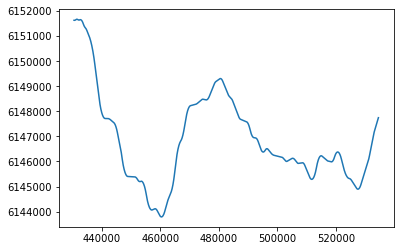

In [8]:
plt.plot(north,west)

In [9]:
# for record in DBF('axis_20m_Pti_Z_Zrd_Kclass_Trd_Deep_PermInd_calc_gessi_TIPO_IGE.dbf'):
#     print(record)

In [382]:


dbf = Dbf5('axis_20m_Pti_Z_Zrd_Kclass_Trd_Deep_PermInd_calc_gessi_TIPO_IGE.dbf')

df = dbf.to_dataframe()

In [383]:
df.head(3)

Z_road zone Intensity  STB_100Yr Int_simpl  m_s_l_m_      Tipo Deep_Perm  \
0  149.341    1        II       0.22        II   144.392  Rilevato   10 - 30   
1  148.919    1        II       0.22        II   144.538  Rilevato   10 - 30   
2  148.500    1        II       0.22        II   144.593  Rilevato   10 - 30   

  Deep_calc Deep_gessi        POINT_X       POINT_Y Tipologia IGE_princi  
0   10 - 30        >30  430496.244863  6.151614e+06       NaN        NaN  
1   10 - 30        >30  430516.237029  6.151614e+06       NaN        NaN  
2   10 - 30        >30  430536.229195  6.151613e+06       NaN        NaN

### Converto la colonna Tipologia

In [384]:
df.Tipologia.unique()

array([nan, 'GRANULARE', 'FINE', 'NO INFO'], dtype=object)

In [385]:
df['Tipologia'] = df['Tipologia'].replace('NO INFO','GRANULARE')

In [386]:
df['Tipologia'] = df['Tipologia'].replace(np.nan, 0)

In [387]:
df.Tipologia.unique()

array([0, 'GRANULARE', 'FINE'], dtype=object)

### Converto la colonna Deep Calc in numerico

In [388]:
df.loc[df.Deep_calc=='>30','Deep_calc_num'] = np.random.uniform(30,60,df.Deep_calc[df.Deep_calc=='>30'].shape[0])

In [389]:
df.loc[df.Deep_calc=='10 - 30','Deep_calc_num'] = np.random.uniform(10,30,df.Deep_calc[df.Deep_calc=='10 - 30'].shape[0])

In [390]:
df.loc[df.Deep_calc=='3 - 10','Deep_calc_num'] = np.random.uniform(3,10,df.Deep_calc[df.Deep_calc=='3 - 10'].shape[0])

In [391]:
df.loc[df.Deep_calc=='0 - 3','Deep_calc_num'] = np.random.uniform(0,3,df.Deep_calc[df.Deep_calc=='0 - 3'].shape[0])

In [392]:
df['Deep_calc_num']=df['Deep_calc_num'].astype('float')

### Converto la colonna Deep_Perm in numerico

In [393]:
df.loc[df.Deep_Perm=='>30','Deep_Perm_num'] = np.random.uniform(30,60,df.Deep_Perm[df.Deep_Perm=='>30'].shape[0])

In [394]:
df.loc[df.Deep_Perm=='10 - 30','Deep_Perm_num'] = np.random.uniform(10,30,df.Deep_Perm[df.Deep_Perm=='10 - 30'].shape[0])

In [395]:
df.loc[df.Deep_Perm=='3 - 10','Deep_Perm_num'] = np.random.uniform(3,10,df.Deep_Perm[df.Deep_Perm=='3 - 10'].shape[0])

In [396]:
df.loc[df.Deep_Perm=='0 - 3','Deep_Perm_num'] = np.random.uniform(0,3,df.Deep_Perm[df.Deep_Perm=='0 - 3'].shape[0])

In [397]:
df.loc[(df.Deep_Perm == df.Deep_calc),'Deep_Perm_num'] = df.loc[(df.Deep_Perm == df.Deep_calc),'Deep_calc_num']

In [400]:
df['Deep_Perm_num']=df['Deep_Perm_num'].astype('float')

### Creo colonna progressive e gestisco punti tracciato

In [402]:
df = df.copy()
df_save = df.copy()

In [404]:
df['POINT_X_Diff'] = df.POINT_X.diff().replace(np.nan, 0)

In [405]:
df['POINT_Y_Diff'] = df.POINT_Y.diff().replace(np.nan, 0)

In [406]:
df['lenght'] = np.sqrt(df.POINT_X_Diff**2 + df.POINT_Y_Diff**2).round().astype('int')

In [407]:
df['lenght'].unique()

array([ 0, 20], dtype=int64)

In [408]:
df['progressiva'] = df.lenght.cumsum().round().astype('int')

In [409]:
df.dtypes

Z_road           float64
zone              object
Intensity         object
STB_100Yr        float64
Int_simpl         object
m_s_l_m_         float64
Tipo              object
Deep_Perm         object
Deep_calc         object
Deep_gessi        object
POINT_X          float64
POINT_Y          float64
Tipologia         object
IGE_princi        object
Deep_calc_num    float64
Deep_Perm_num    float64
POINT_X_Diff     float64
POINT_Y_Diff     float64
lenght             int32
progressiva        int32
dtype: object

# calcololo offset del tracciato

### creo colonna con differenza ogni 2 punti

In [410]:
df['diff_X_roll2'] = df.POINT_X.diff(periods=2).shift(-1).fillna(method = 'bfill').fillna(method = 'ffill')

In [411]:
df['diff_Y_roll2'] = df.POINT_Y.diff(periods=2).shift(-1).fillna(method = 'bfill').fillna(method = 'ffill')

In [412]:
df1 = df[[
 'POINT_X',
 'POINT_Y',
 'diff_X_roll2',
 'diff_Y_roll2']]

In [413]:
df1.columns

Index(['POINT_X', 'POINT_Y', 'diff_X_roll2', 'diff_Y_roll2'], dtype='object')

In [414]:
def perpendicular(a) :
    b = np.empty_like(a)
    b[0] = a[1]
    b[1] = -a[0]
    return b

def calcangle_2v(x):
    v2 = np.array([0, 1])
    v1 = x/np.linalg.norm(x)
    dot_prod = np.dot(v1, v2)
    return math.degrees(np.arccos(dot_prod))


def offset(cx, cy, vx, vy, offset):

    vdiff = np.array([vx, vy]).T
    
    # normalize the vector difference
    # vdiffnorm = vdiff/(np.linalg.norm(vdiff))
    # for row wise normalization need to set axis = 1 then to avoid errors on shape just use np.newaxis
    vdiffnorm = vdiff/(np.linalg.norm(vdiff, axis=1))[:, np.newaxis]
    # calculate its normalized perpendicular vector
    
    vnorm = np.apply_along_axis(perpendicular, 1, vdiffnorm)
    angle = np.apply_along_axis(calcangle_2v, 1, vnorm)
    voff = vnorm * offset
    
    vtrack = np.array([cx,cy]).T
    vtrackup = vtrack + voff
    vtrackdown = vtrack - voff
    
    #breakpoint()
    
    return vtrackup, vtrackdown, angle
    

In [439]:
vtrackup, vtrackdown, angle = offset(df.POINT_X, df.POINT_Y, df1.diff_X_roll2, df1.diff_Y_roll2, 100 )
vtrackup500, vtrackdown500, angle500 = offset(df.POINT_X, df.POINT_Y, df1.diff_X_roll2, df1.diff_Y_roll2, 500 )
vtrackup2000, vtrackdown2000, angle2000 = offset(df.POINT_X, df.POINT_Y, df1.diff_X_roll2, df1.diff_Y_roll2, 2000 )

#### Creo colonne nel df

In [500]:
columns_ = ['vtrackupx','vtrackdownx','vtrackup500x','vtrackdown500x','vtrackup2000x','vtrackdown2000x']
values_ = [vtrackup[:,0],vtrackdown[:,0],vtrackup500[:,0],vtrackdown500[:,0],vtrackup2000[:,0],vtrackdown2000[:,0]]
for e,i in enumerate(columns_):
    df[i] = values_[e]
columns_ = ['vtrackupy','vtrackdowny','vtrackup500y','vtrackdown500y','vtrackup2000y','vtrackdown2000y']
values_ = [vtrackup[:,1],vtrackdown[:,1],vtrackup500[:,1],vtrackdown500[:,1],vtrackup2000[:,1],vtrackdown2000[:,1]] 
for e,i in enumerate(columns_):
    df[i] = values_[e]

### Per ogni settore conto le occorrenze

In [467]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [ ]:
point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

In [522]:
df['n_karst'] = np.nan
df0['sector2000'] = np.nan

for i in range(df.shape[0]-1):
    polygon = Polygon([tuple(df[['vtrackup2000x','vtrackup2000y']].loc[i,:]),
                      tuple(df[['vtrackup2000x','vtrackup2000y']].loc[i+1,:]),
                      tuple(df[['vtrackdown2000x','vtrackdown2000y']].loc[i+1,:]),
                      tuple(df[['vtrackdown2000x','vtrackdown2000y']].loc[i,:])])
    n_karst = 0
    for e in range(df0.shape[0]):
        point = Point(df0['long'][e], df0['lat'][e])
        if polygon.contains(point):
            df0.loc[df.index[e], 'sector2000'] = i
            n_karst += 1
        else:
            pass
    df.loc[df.index[i], 'n_karst'] = n_karst
    df.loc[df.index[i], 'sector_area'] = polygon.area
    
    if i>10: break

In [523]:
df

Z_road zone Intensity  STB_100Yr Int_simpl  m_s_l_m_      Tipo  \
0     149.341    1        II       0.22        II   144.392  Rilevato   
1     148.919    1        II       0.22        II   144.538  Rilevato   
2     148.500    1        II       0.22        II   144.593  Rilevato   
3     148.080    1        II       0.22        II   144.183  Rilevato   
4     147.659    1        II       0.22        II   143.507  Rilevato   
...       ...  ...       ...        ...       ...       ...       ...   
5434  104.911   44        VI       0.00        VI   102.031  Rilevato   
5435  104.310   44        VI       0.00        VI   101.077  Rilevato   
5436  103.711   44        VI       0.00        VI   100.037  Rilevato   
5437  103.111   44        VI       0.00        VI    98.870  Rilevato   
5438  102.510   44        VI       0.00        VI    97.612  Rilevato   

     Deep_Perm Deep_calc Deep_gessi  ...  vtrackup2000y  vtrackdown2000y  \
0      10 - 30   10 - 30        >30  ...   6.149615e+06     6.153614e+06   
1      10 - 30   10 - 30        >30  ...   6.149615e+06     6.153613e+06   
2      10 - 30   10 - 30        >30  ...   6.149614e+06     6.153613e+06   
3      10 - 30   10 - 30        >30  ...   6.149613e+06     6.153612e+06   
4      10 - 30   10 - 30        >30  ...   6.149613e+06     6.153612e+06   
...        ...       ...        ...  ...            ...              ...   
5434    3 - 10       >30        >30  ...   6.145847e+06     6.149567e+06   
5435    3 - 10       >30        >30  ...   6.145855e+06     6.149574e+06   
5436    3 - 10       >30        >30  ...   6.145862e+06     6.149582e+06   
5437    3 - 10       >30        >30  ...   6.145869e+06     6.149589e+06   
5438    3 - 10       >30        >30  ...   6.145877e+06     6.149597e+06   

          vtrackupx    vtrackdownx   vtrackup500x  vtrackdown500x  \
0     430493.446263  430499.043463  430482.251863   430510.237863   
1     430513.438429  430519.035629  430502.244029   430530.230029   
2     430533.696935  430538.761455  430523.567897   430548.890493   
3     430554.338297  430558.109013  430546.796866   430565.650444   
4     430574.716616  430577.726166  430568.697516   430583.745266   
...             ...            ...            ...             ...   
5434  534428.817384  534355.263936  534575.924280   534208.157040   
5435  534447.415720  534373.862316  534594.522530   534226.755506   
5436  534466.014100  534392.460652  534613.120996   534245.353756   
5437  534484.612458  534411.059010  534631.719354   534263.952114   
5438  534503.210816  534429.657368  534650.317712   534282.550472   

      vtrackup2000x  vtrackdown2000x  n_karst   sector_area  
0     430440.272862    430552.216864      0.0  79999.998785  
1     430460.265028    430572.209030      0.0  79999.856810  
2     430485.584002    430586.874388      1.0  79997.947642  
3     430518.516500    430593.930810      0.0  79999.712473  
4     430546.125891    430606.316891      0.0  79999.429700  
...             ...              ...      ...           ...  
5434  535127.575141    533656.506179      NaN  79999.894242  
5435  535146.173067    533675.104969      NaN  79999.894242  
5436  535164.771857    533693.702895      NaN  79999.894242  
5437  535183.370215    533712.301253      NaN  79999.894242  
5438  535201.968573    533730.899611      NaN  79999.894242  

[5439 rows x 42 columns]

In [509]:
df0['long'][1]

430196.9608

In [501]:
tuple(df[['vtrackupx','vtrackupy']].loc[i,:])

vtrackupx    4.305134e+05
vtrackupy    6.151514e+06
Name: 1, dtype: float64

### CREO PLOT CON MATPLOTLIB

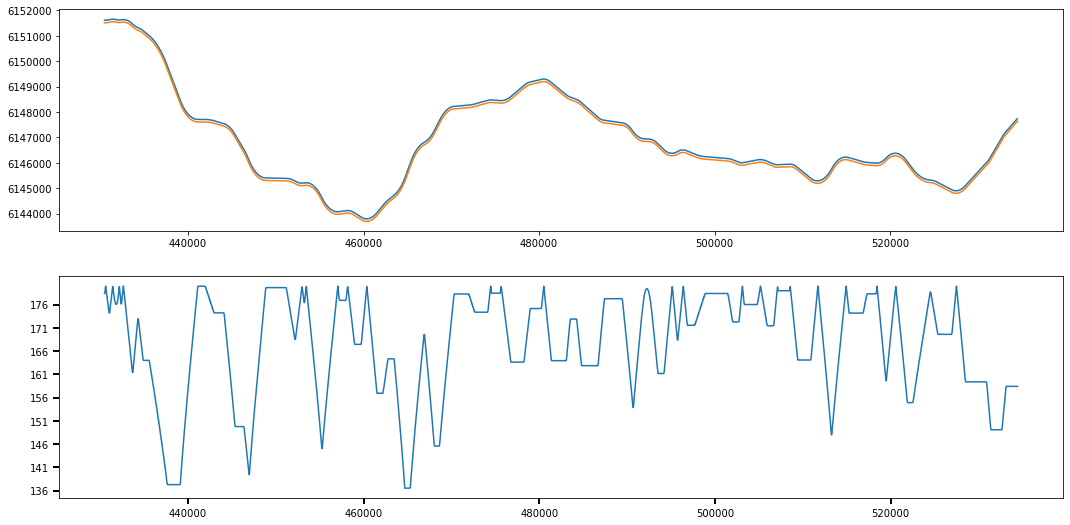

In [417]:
fig = plt.figure()

fig.set_figheight(9)
fig.set_figwidth(18)

ax = fig.add_subplot(211)
ax2= fig.add_subplot(212)

ax.plot(df.POINT_X, df.POINT_Y)
ax.plot(vtrackup[:, 0], vtrackup[:, 1])
ax2.plot(vtrackdown[:, 0], angle)
ax2.tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5)

plt.yticks(np.arange(int(min(angle)), int(max(angle))+1, 5.0))

plt.show()

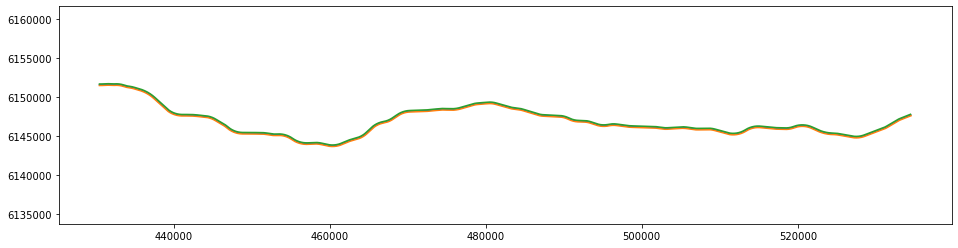

In [418]:
fig = plt.figure()

fig.set_figheight(4)
fig.set_figwidth(16)

ax = fig.add_subplot(111)

ax.plot(df.POINT_X, df.POINT_Y)
ax.plot(vtrackup[:, 0], vtrackup[:, 1])
ax.plot(vtrackdown[:, 0], vtrackdown[:, 1])
ax.axis('equal')

plt.show()

### LEGGO IL FILE CON I KARST

In [420]:
#df0 = pd.read_clipboard()

In [421]:
# df0.columns = ['ref', 'n_occ', 'long', 'lat', 'type', 'type2', 'type3', 'dmax', 'dmin','dave', 'h', 'h/d', 'area', 'volume', 'era', 'fonte']

In [273]:
df0.to_csv('karst.csv', index=False)

In [274]:
df0 = pd.read_csv('karst.csv')

In [275]:
df0.columns

Index(['ref', 'n_occ', 'long', 'lat', 'type', 'type2', 'type3', 'dmax', 'dmin',
       'dave', 'h', 'h/d', 'area', 'volume', 'era', 'fonte'],
      dtype='object')

In [276]:
df0

ref  n_occ          long           lat        type    type2     type3  \
0        1     11  430000.85568  6.150061e+06      Inbuto  Ellisse  Piattino   
1        2     12  430196.96080  6.150400e+06      Inbuto  Ellisse     Tazza   
2        3     13  430516.76164  6.150605e+06      Inbuto  Ellisse  Piattino   
3        4     14  430862.37713  6.150958e+06      Inbuto  Cerchio     Tazza   
4        5     15  431581.18010  6.150717e+06      Inbuto  Ellisse     Tazza   
...    ...    ...           ...           ...         ...      ...       ...   
1299  1645   2649  455414.73121  6.144275e+06  Subsidenza  Cerchio     Tazza   
1300  1646   2650  460713.00692  6.143363e+06      Inbuto  Ellisse     Tazza   
1301  1647   2651  463389.04750  6.144496e+06      Inbuto  Ellisse     Tazza   
1302  1665   2669  462341.22869  6.144309e+06      Inbuto  Cerchio     Tazza   
1303  1666   2670  462674.37843  6.144258e+06      Inbuto  Ellisse     Tazza   

      dmax  dmin  dave    h   h/d   area  volume      era              fonte  
0     23.1  11.7  17.4  1.7  0.10  213.0   185.6   Antica  Immagini spaziali  
1     16.1  10.2  13.2  1.6  0.13  129.5   106.7  Giovane  Immagini spaziali  
2     23.9  15.2  19.6  2.0  0.10  286.3   280.3   Antica  Immagini spaziali  
3     19.8   NaN  19.8  2.5  0.13  308.0   381.4  Giovane  Immagini spaziali  
4     26.5  21.7  24.1  3.0  0.13  451.8   680.9  Giovane  Immagini spaziali  
...    ...   ...   ...  ...   ...    ...     ...      ...                ...  
1299  20.0   NaN  20.0  2.5  0.13  314.0   392.5   Antica       Ricognizione  
1300  17.0  12.0  14.5  1.8  0.13  160.1   145.1   Antica       Ricognizione  
1301  25.0  15.0  20.0  2.5  0.13  294.4   368.0   Antica       Ricognizione  
1302   6.0   NaN   6.0  0.8  0.13   28.3    10.6   Antica       Ricognizione  
1303   7.0   4.0   5.5  0.7  0.13   22.0     7.6   Antica       Ricognizione  

[1304 rows x 16 columns]

In [277]:
df0.ref = pd.to_numeric(df0.ref, errors='coerce', downcast='integer')
df0.n_occ = pd.to_numeric(df0.n_occ, errors='coerce', downcast='integer')
df0.long = pd.to_numeric(df0.long, errors='coerce')
df0.lat = pd.to_numeric(df0.lat, errors='coerce')
df0.dmax = pd.to_numeric(df0.dmax, errors='coerce')
df0.dmin = pd.to_numeric(df0.dmin, errors='coerce')
df0.dave = pd.to_numeric(df0.dave, errors='coerce')
df0.h = pd.to_numeric(df0.h, errors='coerce')
df0.area = pd.to_numeric(df0.area, errors='coerce')
df0.volume = pd.to_numeric(df0.volume, errors='coerce')

### Per ogni settore conto le occorrenze

In [467]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [ ]:
point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

#### Calcolo su aree di 20m x 2000

In [527]:
####  NON USARE QUESTA MA LA ROUTINE CON df_g50 in ovvero per settori ogni km

df['n_karst'] = np.nan
df['sector_area'] = np.nan
df0['sector2000'] = np.nan


for i in range(df.shape[0]-1):
    polygon = Polygon([tuple(df[['vtrackup2000x','vtrackup2000y']].loc[i,:]),
                      tuple(df[['vtrackup2000x','vtrackup2000y']].loc[i+1,:]),
                      tuple(df[['vtrackdown2000x','vtrackdown2000y']].loc[i+1,:]),
                      tuple(df[['vtrackdown2000x','vtrackdown2000y']].loc[i,:])])
    n_karst = 0
    for e in range(df0.shape[0]):
        point = Point(df0.loc[df0.index[0],['long']], df0.loc[df0.index[0],['lat']])
        if polygon.contains(point):
            df0.loc[df0.index[e], 'sector2000'] = i
            n_karst += 1
        else:
            pass
    df.loc[df.index[i], 'n_karst'] = n_karst
    df.loc[df.index[i], 'sector_area'] = polygon.area

### CREO df_g50

In [932]:
df_g50 = df.groupby(df.index // 50).agg({'progressiva':'first', 'POINT_X':'first', 'POINT_Y':'first', 
                                         'vtrackupx':'first', 'vtrackupy':'first', 'vtrackdownx':'first', 'vtrackdowny':'first',
                                         'vtrackup2000x':'first', 'vtrackup2000y':'first', 'vtrackdown2000x':'first', 'vtrackdown2000y':'first'})

In [933]:
df_g50 = df_g50.append(df[['progressiva', 'POINT_X', 'POINT_Y', 'vtrackupx', 'vtrackupy', 'vtrackdownx', 'vtrackdowny',
    'vtrackup2000x', 'vtrackup2000y', 'vtrackdown2000x', 'vtrackdown2000y']].tail(1), ignore_index=True)

In [934]:
df_g50

progressiva        POINT_X       POINT_Y      vtrackupx     vtrackupy  \
0              0  430496.244863  6.151614e+06  430493.446263  6.151514e+06   
1           1000  431494.653693  6.151655e+06  431493.047858  6.151555e+06   
2           2000  432493.360825  6.151635e+06  432498.527350  6.151535e+06   
3           3000  433483.166316  6.151527e+06  433456.563374  6.151430e+06   
4           4000  434455.284887  6.151303e+06  434439.794847  6.151204e+06   
..           ...            ...           ...            ...           ...   
105       105000  531109.722031  6.146066e+06  531150.425694  6.145975e+06   
106       106000  531978.106871  6.146560e+06  532029.469694  6.146475e+06   
107       107000  532837.827049  6.147071e+06  532885.084375  6.146983e+06   
108       108000  533759.696487  6.147457e+06  533796.473211  6.147364e+06   
109       108760  534466.434092  6.147737e+06  534503.210816  6.147644e+06   

       vtrackdownx   vtrackdowny  vtrackup2000x  vtrackup2000y  \
0    430499.043463  6.151714e+06  430440.272862   6.149615e+06   
1    431496.259528  6.151755e+06  431462.537002   6.149655e+06   
2    432488.194300  6.151735e+06  432596.691326   6.149638e+06   
3    433509.769258  6.151623e+06  432951.107486   6.149599e+06   
4    434470.774927  6.151402e+06  434145.484082   6.149327e+06   
..             ...           ...            ...            ...   
105  531069.018368  6.146157e+06  531923.795290   6.144239e+06   
106  531926.744048  6.146646e+06  533005.363334   6.144844e+06   
107  532790.569723  6.147159e+06  533782.973567   6.145309e+06   
108  533722.919763  6.147550e+06  534495.230968   6.145597e+06   
109  534429.657368  6.147830e+06  535201.968573   6.145877e+06   

     vtrackdown2000x  vtrackdown2000y  
0      430552.216864     6.153614e+06  
1      431526.770384     6.153655e+06  
2      432390.030324     6.153632e+06  
3      434015.225146     6.153455e+06  
4      434765.085692     6.153279e+06  
..               ...              ...  
105    530295.648772     6.147893e+06  
106    530950.850408     6.148276e+06  
107    531892.680531     6.148834e+06  
108    533024.162006     6.149317e+06  
109    533730.899611     6.149597e+06  

[110 rows x 11 columns]

### CONTO I KARST CHE CADONO NELL'AREA DI 1KM 
####  - aggiorno il df0 con i carst con la colonna "sector2000_50" che associa al karst un settore g50 di riferimento
####  - aggiorno il df_g50 con le colonne 'n_karst' e 'sector_area'

In [946]:
df_g50['n_karst'] = np.nan
df_g50['sector_area'] = np.nan
df0['sector2000_50'] = np.nan


for i in range(df_g50.shape[0]-1):
    
    if (df_g50.progressiva > 50000):
        pass
    
    else:
        polygon = Polygon([tuple(df_g50[['vtrackup2000x','vtrackup2000y']].loc[i,:]),
                          tuple(df_g50[['vtrackup2000x','vtrackup2000y']].loc[i+1,:]),
                          tuple(df_g50[['vtrackdown2000x','vtrackdown2000y']].loc[i+1,:]),
                          tuple(df_g50[['vtrackdown2000x','vtrackdown2000y']].loc[i,:])])
        n_karst = 0
        for e in range(df0.shape[0]):
            point = Point(df0.loc[df0.index[e],['long']], df0.loc[df0.index[e],['lat']])
            if polygon.contains(point):
                df0.loc[df0.index[e], 'sector2000_50'] = i
                n_karst += 1
            else:
                pass
        df_g50.loc[df_g50.index[i], 'n_karst'] = n_karst
        df_g50.loc[df_g50.index[i], 'sector_area'] = polygon.area/1e6

In [947]:
df_g50['n_karst'] = df_g50['n_karst'].fillna(0)
df_g50['sector_area'] = df_g50['sector_area'].fillna(1000000)        #  oltre la PK 50 sarà tutto 1000000

In [1118]:
df0.dropna(subset=['sector2000_50'], inplace=True)

In [1010]:
df0.sector2000_50 = df0.sector2000_50.astype('float')

In [ ]:
df_g50.reset_index(inplace = True)

In [1084]:
df_g50.rename(columns={'index':'ref_index'}, inplace = True)

# DA QUI IN POI INIZIA LO STOCHASTIC

### TROVA DISTRIBUZIONE PER OGNI ZONA E CREA STOCH

In [1011]:
h = 1

zo_dave = df0[(df0.sector2000_50==h)&(df0.era == "Giovane")].dave
# zo_dave = df0[(df0.sector2000_50==h)].dave

In [600]:
# from Finddistribution import *

In [1012]:
params = st.expon.fit(zo_dave, floc=0)

In [801]:
# # Create models from data
# import numpy as np
# import scipy.stats as st
# import warnings

# def best_fit_distribution_exp(data, bins=10, ax=None):
#     """Model data by finding best fit distribution to data"""
#     # Get histogram of original data
#     y, x = np.histogram(data, bins=bins, density=True)
#     x = (x + np.roll(x, -1))[:-1] / 2.0


#     # Distributions reduced to best known
#     DISTRIBUTIONS = [
#         st.expon, st.exponpow
#     ]

#     # Distributions available in pymc3
#     # DISTRIBUTIONS = [st.norm]

#     # Best holders
#     best_distribution = st.norm
#     best_params = (0.0, 1.0)
#     best_sse = np.inf

#     # Estimate distribution parameters from data
#     for distribution in DISTRIBUTIONS:

#         # Try to fit the distribution
#         try:
#             # Ignore warnings from data that can't be fit
#             with warnings.catch_warnings():
#                 warnings.filterwarnings('ignore')

#                 # fit dist to data
#                 params = distribution.fit(data, floc=0)

#                 # Separate parts of parameters
#                 arg = params[:-2]
#                 loc = params[-2]
#                 scale = params[-1]

#                 # Calculate fitted PDF and error with fit in distribution
#                 pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
#                 sse = np.sum(np.power(y - pdf, 2.0))

#                 # if axis pass in add to plot

#                 try:
#                     if ax:
#                         pd.Series(pdf, x).plot(ax=ax)
#                     pass

#                 except Exception as ex:

#                     template = "An exception of type {0} occurred. Arguments:\n{1!r}"
#                     message = template.format(type(ex).__name__, ex.args)
#                     print(message)

#                     pass

#                 # identify if this distribution is better
#                 if best_sse > sse > 0:
#                     best_distribution = distribution
#                     best_params = params
#                     best_sse = sse

#         except Exception as ex:

#             template = "An exception of type {0} occurred. Arguments:\n{1!r}"
#             message = template.format(type(ex).__name__, ex.args)
#             print(message)

#             pass

#     return (best_distribution.name, best_params)


# def make_pdf(dist, params, size=10000):
#     """Generate distributions's Probability Distribution Function """

#     # Separate parts of parameters
#     arg = params[:-2]
#     loc = params[-2]
#     scale = params[-1]

#     # Get sane start and end points of distribution
#     start = dist.ppf(0.01, *arg, loc=loc,
#                      scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
#     end = dist.ppf(0.99, *arg, loc=loc,
#                    scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

#     # Build PDF and turn into pandas Series
#     x = np.linspace(start, end, size)
#     y = dist.pdf(x, loc=loc, scale=scale, *arg)
#     pdf = pd.Series(y, x)

#     return pdf


In [957]:
# with plt.style.context(("seaborn-pastel",)):
    
#     data = pd.Series(zo_dave.values.ravel())

#     bins = int(len(data))
#     print('bins '+str(bins))

#     y, x = np.histogram(data, bins=bins, density=True)
#     x = (x + np.roll(x, -1))[:-1] / 2.0  #per ogni bin (x1 + x2)/2 trovo xc centroid


#     # Plot for comparison all distribution lines *********

#     plt.figure(figsize=(9,6))
#     ax = data.plot(kind='hist', bins=bins, density=True, alpha=0.5)
#     # Save plot limits

#     dataYLim = ax.get_ylim()
#     dataXLim = ax.get_xlim()   #(ax.get_xlim()[0]*0.8,ax.get_xlim()[1]*1.2)

#     ax.set_xlabel('')
#     ax.set_ylabel('Frequency')

#     # Find best fit distribution
#     best_fit_name, best_fit_params = best_fit_distribution_exp(data, bins*10, ax)
#     best_dist = getattr(st, best_fit_name)

#     print('Distribution found: '+str(best_fit_name))


#     ax.set_ylim(dataYLim)
#     ax.set_xlim(dataXLim)



#     # Make PDF with best params 
#     pdf = make_pdf(best_dist, best_fit_params)

#     # Display


#     ax = pdf.plot(lw=2, label='PDF', color='Navy', legend=True)

#     param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
#     param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
#     dist_str = '{}({})'.format(best_fit_name, param_str)

#     ax.set_title('distribution ' + u'\n' + dist_str)

# #             ax.set_ylim(dataYLim)
#     ax.set_xlim(dataXLim)
#     plt.show()

            

In [1013]:
scale = best_fit_params[1]

In [959]:
# fig, ax = plt.subplots(1,1)

# # scale factor for artificial
# scale = scale

# # artificial histogram
# r = expon.rvs(scale=scale, size=1000)
# bins = r.shape[0]
# ax.hist(r, bins=int(bins/10), density=True, histtype='stepfilled', alpha=0.2)


# # fitted distribution

# x = np.linspace(expon.ppf(0.1),
#                 expon.ppf(80), 1000)
# x = np.linspace(0.1, 80, 1000)
# f1 = expon.pdf(x=x, scale=scale)
# ax.plot(x, f1,
#        'b-', lw=1, alpha=0.6, label='expon pdf1')


# # Real data
# data = pd.Series(zo_dave.values.ravel())
# bins = int(len(data))
# ax = data.plot(kind='hist', bins=bins, density=True, alpha=0.5)


In [1014]:
zo_perc5 = int(np.percentile(zo_dave, 5))
zo_perc95 = int(np.percentile(zo_dave, 95))
zo_karstnum = zo_dave.shape[0]

zo_perc5, zo_perc95, zo_karstnum

(8, 76, 17)

In [1015]:
size = 1000
r = expon.rvs(scale=scale, size=size)

zo_karstnum_simul = r[(zo_perc5<r)&(r<zo_perc95)].shape[0]
zo_nbelow5p_simul = r[r<zo_perc5].shape[0]
zo_tot = zo_karstnum_simul + zo_nbelow5p_simul
zo_tot_prop = zo_tot/zo_karstnum_simul
zo_pop_prop = size/zo_karstnum_simul

zo_karstnum_simul, zo_nbelow5p_simul, zo_tot, zo_tot_prop, zo_pop_prop

(682, 274, 956, 1.401759530791789, 1.466275659824047)

In [1024]:
zo_nbelow5p = int(round(zo_karstnum/zo_karstnum_simul*zo_nbelow5p_simul,0))
zo_nbelow5p

7

In [839]:
# the number of data to obtain 27 karst less than 6m is
# 37/538*1000


In [1017]:
zo_karstnum_pop = int(round(zo_karstnum/zo_karstnum_simul*r.shape[0],0))
zo_karstnum_pop

25

In [1025]:
zo_karstnum_pop = int(round(zo_pop_prop *zo_karstnum, 0))
zo_karstnum_pop

25

### CREO UN QUADRATO GRANDE ATTORNO ALL'AREA

In [744]:
# per i diametri
# devo fare una distribuzione con 68 elementi e inserire solo i primi 
# 27 elementi ordinati per grandezza

In [1029]:
xmin = min(df_g50.loc[df_g50.index[h],'vtrackdown2000x'],
                           df_g50.loc[df_g50.index[h+1],'vtrackdown2000x'],
                           df_g50.loc[df_g50.index[h],'vtrackup2000x'],
                           df_g50.loc[df_g50.index[h+1],'vtrackup2000x']
                          )
xmax = max(df_g50.loc[df_g50.index[h],'vtrackdown2000x'],
                           df_g50.loc[df_g50.index[h+1],'vtrackdown2000x'],
                           df_g50.loc[df_g50.index[h],'vtrackup2000x'],
                           df_g50.loc[df_g50.index[h+1],'vtrackup2000x']
                          )
ymin = min(df_g50.loc[df_g50.index[h],'vtrackdown2000y'],
                           df_g50.loc[df_g50.index[h+1],'vtrackdown2000y'],
                           df_g50.loc[df_g50.index[h],'vtrackup2000y'],
                           df_g50.loc[df_g50.index[h+1],'vtrackup2000y']
                          )
ymax = max(df_g50.loc[df_g50.index[h],'vtrackdown2000y'],
                           df_g50.loc[df_g50.index[h+1],'vtrackdown2000y'],
                           df_g50.loc[df_g50.index[h],'vtrackup2000y'],
                           df_g50.loc[df_g50.index[h+1],'vtrackup2000y']
                          )
area_gr = (xmax-xmin)*(ymax-ymin)/1e6
n_karst_5p_areag = int(round(zo_nbelow5p/df_g50.sector_area[h]*area_gr,0))
# 5p + visiblekarst
n_karst_areag = int(round(zo_nbelow5p + zo_karstnum / df_g50.sector_area[h] * area_gr,0))
# 5p + visiblekarst + outofsize
zo_karstnum_pop_areag = int(round(zo_karstnum_pop / df_g50.sector_area[h] * area_gr,0))

In [1030]:
n_karst_5p_areag, n_karst_areag, zo_karstnum_pop_areag

(8, 26, 29)

In [1039]:
stoch_karstx = np.random.uniform(xmin, xmax, n_karst_areag)
stoch_karsty = np.random.uniform(ymin, ymax, n_karst_areag)
# creo the full curve in the areagrande areag estraggo i primi n-karst-5p-areag valori
stoch_karstdia = expon.rvs(scale=scale, size=zo_karstnum_pop_areag)
stoch_karstdia.sort()
stoch_karstdia = stoch_karstdia[:n_karst_areag]

#### creo l'array con tutti i karst sotchastici nell'area grande

In [1040]:
zo_arr = np.vstack([stoch_karstx, stoch_karsty, stoch_karstdia]).T

#### Rimuovo i karst fuori dall'area di settore

In [1110]:
def abs_sum(row, i):
    check = False
    polygon = Polygon([tuple(df_g50[['vtrackup2000x','vtrackup2000y']].loc[i,:]),
                  tuple(df_g50[['vtrackup2000x','vtrackup2000y']].loc[i+1,:]),
                  tuple(df_g50[['vtrackdown2000x','vtrackdown2000y']].loc[i+1,:]),
                  tuple(df_g50[['vtrackdown2000x','vtrackdown2000y']].loc[i,:])])
    
    point = Point(row[0], row[1])
    
    if polygon.contains(point): check = True
    
    return check

zo_arr = np.vstack([zo_arr.T, np.apply_along_axis(abs_sum, 1, zo_arr, h)]).T
zo_arr = zo_arr[zo_arr[:,3]==True][:,:3]
df_zo = pd.DataFrame(zo_arr, columns=['long','lat','dave'])

In [1113]:
df_zo['ref_index'] = h                  # per associazione con df_g50
df_zo['sector2000_50'] = h              # per associazione con df0
df_zo['sector2000_50_str'] = str(h)     # per associazione con df0

### PLOTTO CON PLOTLY

In [1116]:
# import plotly.graph_objects as go

x = df.POINT_X
y = df.POINT_Y

sizeref = 2.*max(df0['dave'])/(300)

df0.dropna(inplace = True)

df0['sector2000_50_str'] = df0.sector2000_50.astype('str')

f = px.scatter(df0, x='long', y='lat', color='sector2000_50_str', size='dave')

f.update_traces(marker=dict(
    sizemode='area', sizeref=sizeref, line_width=2))

# f.add_trace(go.Scatter(x=df0.long, y=df0.lat, mode='markers', marker_size=df0.dave, marker=dict(
#     sizemode='area', sizeref=sizeref, line_width=2)))

f.add_trace(go.Scatter(x=df_zo.long, y=df_zo.lat, mode='markers'))

f.add_trace(go.Scatter(x=x, y=y))

f.add_trace(go.Scatter(x=vtrackup[:, 0], y=vtrackup[:, 1]))
f.add_trace(go.Scatter(x=vtrackdown[:, 0], y=vtrackdown[:, 1]))

f.add_trace(go.Scatter(x=vtrackup500[:, 0], y=vtrackup500[:, 1]))
f.add_trace(go.Scatter(x=vtrackdown500[:, 0], y=vtrackdown500[:, 1]))

f.add_trace(go.Scatter(x=vtrackup2000[:, 0], y=vtrackup2000[:, 1]))
f.add_trace(go.Scatter(x=vtrackdown2000[:, 0], y=vtrackdown2000[:, 1]))




f.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)


f.update_layout(
    autosize=False,
    width=1300,
    height=600,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=4
    ), legend = dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

f.show()

### INTERPOLO PROPRIETA

In [324]:
from scipy.interpolate import griddata

In [329]:
points = df.loc[:,['POINT_X','POINT_Y']].to_numpy()

In [424]:
df.loc[126,['POINT_X', 'POINT_Y', 'progressiva', 'IGE_princi', 'Deep_calc_num']]

POINT_X               433012
POINT_Y          6.15162e+06
progressiva             2520
IGE_princi                3a
Deep_calc_num        8.70222
Name: 126, dtype: object

In [425]:
df.loc[127,['POINT_X', 'POINT_Y', 'progressiva', 'IGE_princi', 'Deep_calc_num']]

POINT_X               433032
POINT_Y          6.15162e+06
progressiva             2540
IGE_princi                3a
Deep_calc_num        3.46413
Name: 127, dtype: object

In [429]:
# creo un punto intermedio dove verificare l'interpolazione
array_pred = (df.loc[126,['POINT_X','POINT_Y']] + df.loc[127,['POINT_X','POINT_Y']]).to_numpy()/2

In [433]:
values = df.loc[:,'Deep_calc_num'].to_numpy()
griddata(points, values, array_pred, method='linear')

array([6.08317356])

In [432]:
values = df.loc[:,'IGE_princi'].to_numpy()
griddata(points, values, array_pred, method='nearest')

array(['3a'], dtype=object)

In [436]:
values = df.loc[:,'progressiva'].to_numpy()
griddata(points, values, array_pred, method='linear')

array([2530.])

## CREO KARST STOCHASTICI

### creo colonne dei boundary 100m 200m e 2000m

###  CONVERSIONE IN COORDINATE UTM

In [ ]:
from pyproj import Proj

In [157]:
x = tuple(df.POINT_X)
y = tuple(df.POINT_Y)

In [158]:
myProj = Proj("+proj=utm +zone=38N, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [159]:
lon, lat = myProj(x, y, inverse=True)

In [531]:
import plotly.express as px

fig = px.scatter_mapbox(lat=lat, lon=lon, zoom=8, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [180]:
fig = px.scatter_mapbox(lat=lat, lon=lon, zoom=7, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()